In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
img = cv2.imread('data set\lionel_messi\MESSI.jpg')
img.shape

(498, 332, 3)

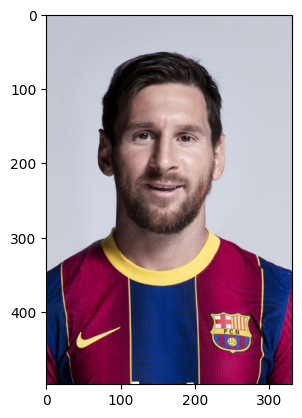

In [3]:
v=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(v)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(498, 332)

In [5]:
gray

array([[193, 195, 196, ..., 203, 203, 203],
       [195, 195, 196, ..., 203, 203, 204],
       [197, 196, 196, ..., 203, 203, 204],
       ...,
       [ 52,  53,  49, ...,  64,  57,  54],
       [ 51,  48,  48, ...,  64,  59,  55],
       [ 54,  48,  48, ...,  65,  60,  56]], dtype=uint8)

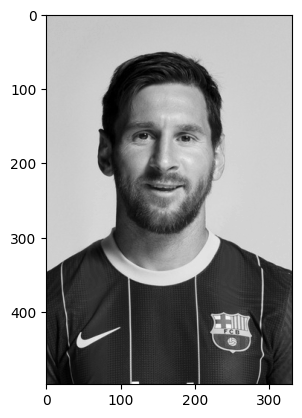

In [6]:
plt.imshow(gray, cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier('OpenCV\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('OpenCV\haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces


array([[ 80, 102, 162, 162]])

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(80, 102, 162, 162)

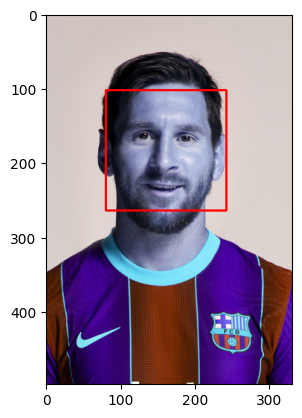

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

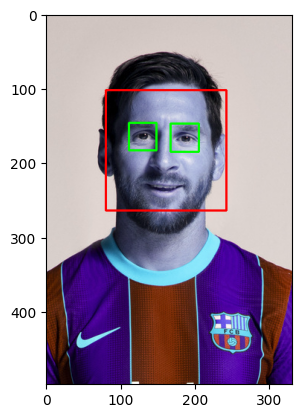

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

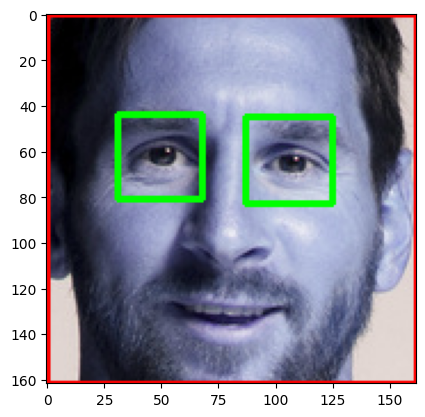

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [12]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

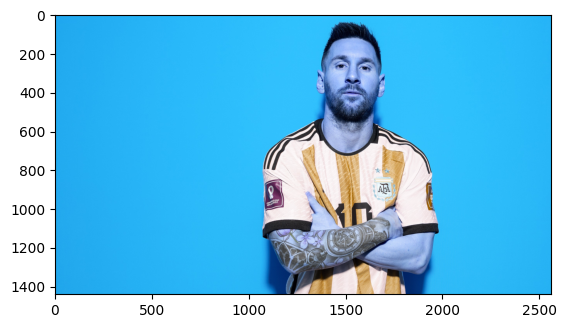

In [13]:
org_image_obstructed = cv2.imread('data set\lionel_messi\\1442809583.jpeg')
plt.imshow(org_image_obstructed)

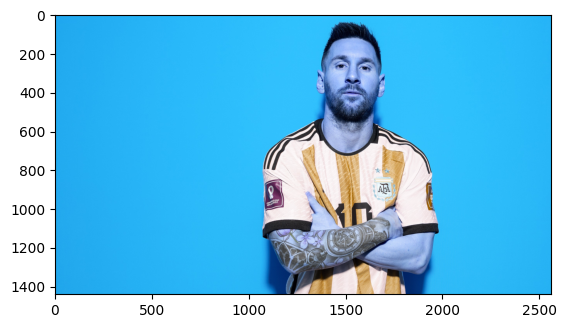

In [14]:
org_image_obstructed1 = cv2.imread('data set\lionel_messi\\3530526-71957688-2560-1440.jpg')
plt.imshow(org_image_obstructed)

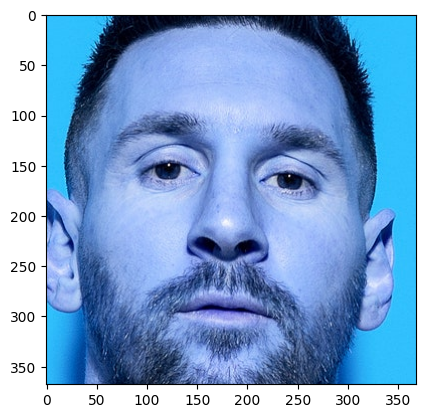

In [15]:
cropped_image = get_cropped_image_if_2_eyes('data set/lionel_messi/1442809583.jpeg')
plt.imshow(cropped_image)

In [16]:
path_to_data = "./data set/"
path_to_cr_data = "./data set/cropped/"

In [17]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [18]:
img_dirs

['./data set/cropped',
 './data set/lionel_messi',
 './data set/maria_sharapova',
 './data set/roger_federer',
 './data set/serena_williams']

In [19]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [20]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        try:
            path=entry.path.replace("\\","/")
            roi_color = get_cropped_image_if_2_eyes(path)
        except Exception as e: 
            print('Issue with image {}'.format(path))    
       
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

cropped
lionel_messi
Generating cropped images in folder:  ./data set/cropped/lionel_messi
Issue with image ./data set/lionel_messi/2024-copa-america-argentina-mens-soccer-team-1-6952548-17201.jpg
Issue with image ./data set/lionel_messi/230525112408-lionel-messi-0521.jpg
Issue with image ./data set/lionel_messi/230609115559-01-lionel-messi-inter-miami-messi.jpg
Issue with image ./data set/lionel_messi/gettyimages-2068694733.jpg
Issue with image ./data set/lionel_messi/Lionel-Messi-014.jpg
Issue with image ./data set/lionel_messi/PT2MIEAWXNCDFMFEBMJBDNMUFY.jpg
Issue with image ./data set/lionel_messi/Rosen-Messi-Miami.jpg
maria_sharapova
Generating cropped images in folder:  ./data set/cropped/maria_sharapova
Issue with image ./data set/maria_sharapova/220420085725-sharapova-fiance.jpg
Issue with image ./data set/maria_sharapova/24px.svg
Issue with image ./data set/maria_sharapova/3268.jpg
Issue with image ./data set/maria_sharapova/449612414_1663669470844966_7535582105464858267_n.jpg
